# Aula Prática: Regressão Linear Simples e Múltipla
Este notebook é uma continuação da aula teórica de regressão e traz prática completa sobre:
- Regressão linear simples e múltipla
- Interpretação da equação da reta
- Avaliação de premissas
- Verificação de multicolinearidade
- Visualizações
- Métricas estatísticas


## 🔧 Gerando dados simulados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Dados simulados
np.random.seed(42)
X1 = np.random.uniform(10, 100, 500)
X2 = np.random.uniform(50, 150, 500)
Y = 50 + 2 * X1 + 0.5 * X2 + np.random.normal(0, 10, 500)

df = pd.DataFrame({'Investimento_Marketing': X1, 'Cliques': X2, 'Vendas': Y})
df.head()

,Investimento_Marketing,Cliques,Vendas
0,43.708611,119.816171,199.102317
1,95.564288,103.609637,279.579950
2,75.879455,80.952762,246.037269
3,63.879264,131.379502,249.554136
4,24.041678,118.473117,162.917818


## 📊 Visualização da relação simples entre investimento e vendas

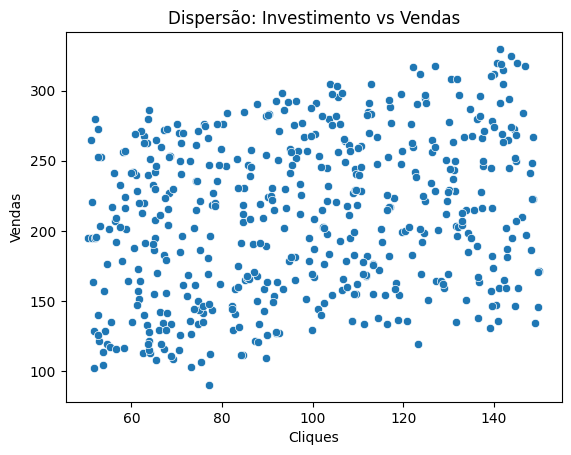

In [3]:
sns.scatterplot(x='Cliques', y='Vendas', data=df)
plt.title('Dispersão: Investimento vs Vendas')
plt.show()

# 📈 Regressão Linear Simples

## Principais indicadores

In [5]:
df.corr()

,Investimento_Marketing,Cliques,Vendas
Investimento_Marketing,1.000000,0.010354,0.950066
Cliques,0.010354,1.000000,0.267758
Vendas,0.950066,0.267758,1.000000


In [6]:
X_simple = df[['Investimento_Marketing']]
y = df['Vendas']

modelo_simples = LinearRegression()
modelo_simples.fit(X_simple, y)

print(f'Coeficiente angular (b): {modelo_simples.coef_[0]:.2f}')
print(f'Intercepto (a): {modelo_simples.intercept_:.2f}')
y_pred_simples = modelo_simples.predict(X_simple)
r2_simples = r2_score(y, y_pred_simples)
print(f'R²: {r2_simples:.2f}')

residuos = y - y_pred_simples

Coeficiente angular (b): 1.97
Intercepto (a): 101.84
R²: 0.90


Vendas = 50 + 2 * Investimento + 0.5 * clique

## Linearidade

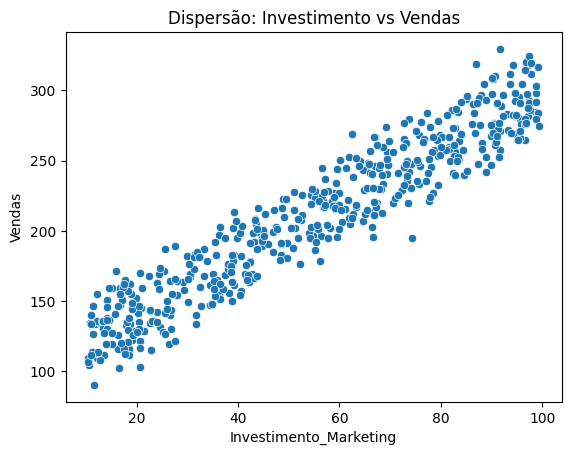

In [ ]:
sns.scatterplot(x='Investimento_Marketing', y='Vendas', data=df)
plt.title('Dispersão: Investimento vs Vendas')
plt.show()

## Resíduos vs Valores Preditos (Homocedasticidade)

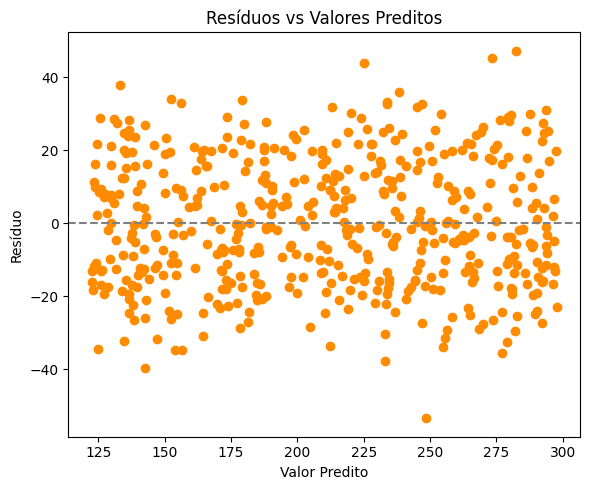

In [7]:
plt.figure(figsize=(6, 5))
plt.scatter(y_pred_simples, residuos, color='darkorange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Resíduos vs Valores Preditos')
plt.xlabel('Valor Predito')
plt.ylabel('Resíduo')
plt.tight_layout()
plt.show()

## Histograma de resíduos (Normalidade dos resíduos)

<Axes: xlabel='Vendas', ylabel='Count'>

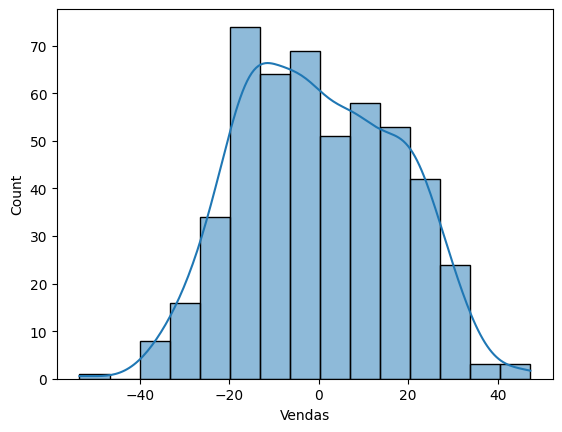

In [8]:
sns.histplot(residuos, kde=True)

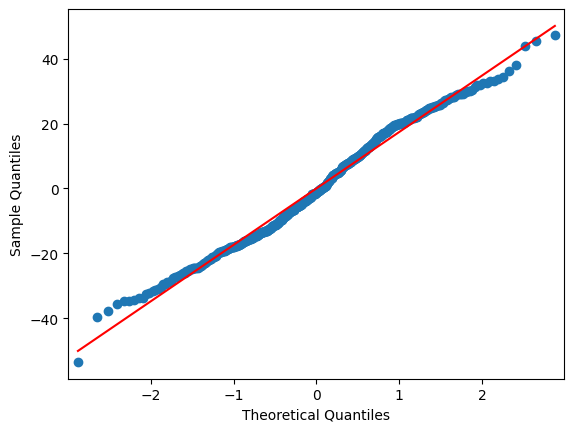

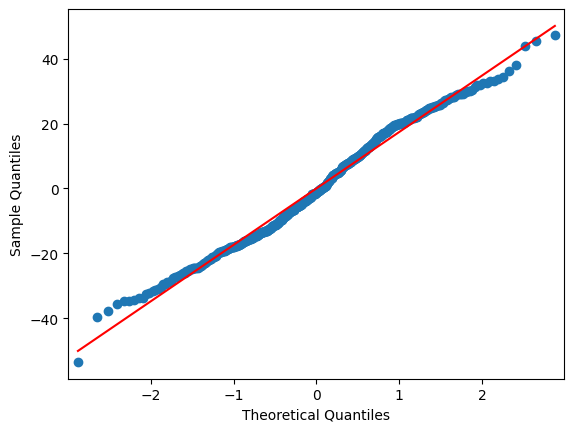

In [9]:
sm.qqplot(residuos, line='s', ax=plt.gca()) #QQ Plot - Compara os quantis dos resíduos com os da distribuição normal.

In [10]:
# Teste de Shapiro-Wilk
stats.shapiro(residuos)

#statistics = valor próximo de 1 indica que os resíduos quase seguem uma normal
# pvalue < 0,05 = Rejeitamos a hipótese nula de normalidade dos resíduos

ShapiroResult(statistic=np.float64(0.9876716850554109), pvalue=np.float64(0.00031394172506484755))

# 📊 Regressão Linear Múltipla

In [11]:
X_multi = df[['Investimento_Marketing', 'Cliques']]
modelo_multipla = LinearRegression()
modelo_multipla.fit(X_multi, y)
y_pred_multi = modelo_multipla.predict(X_multi)

print(f'Coeficientes: {modelo_multipla.coef_}')
print(f'Intercepto: {modelo_multipla.intercept_:.2f}')
print(f'R²: {r2_score(y, y_pred_multi):.2f}')

Coeficientes: [1.96579795 0.5039714 ]
Intercepto: 52.66
R²: 0.97


## ✅ Avaliando Premissas da Regressão Múltipla

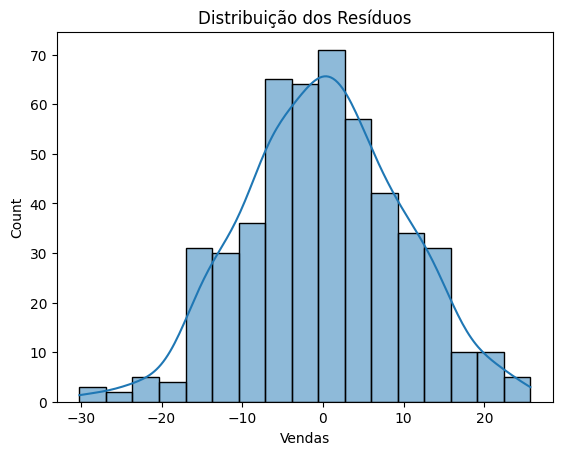

In [12]:
# Resíduos
residuos = y - y_pred_multi
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()

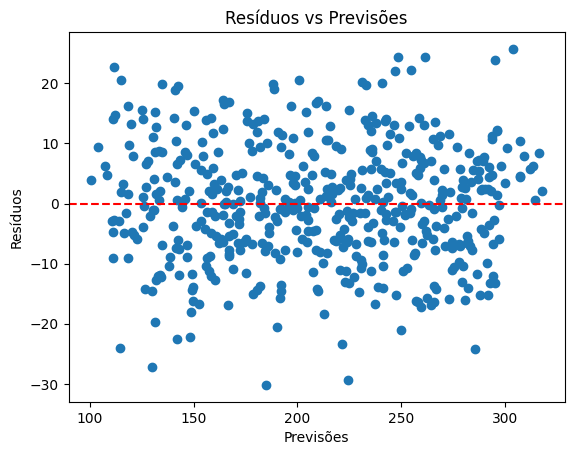

In [13]:
plt.scatter(y_pred_multi, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Previsões')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## 📌 Verificando Multicolinearidade com VIF

| Valor de VIF | Interpretação                              |
| ------------ | ------------------------------------------ |
| 1            | Sem colinearidade (ideal)                  |
| 1 a 5        | Moderada colinearidade (aceitável)         |
| **> 5**      | Forte colinearidade (⚠️ possível problema) |
| **> 10**     | Colinearidade severa (🚨 evite)            |


In [ ]:
# mede o quanto a variância do coeficiente de uma variável explicativa (X) está sendo inflada por causa da correlação com outras variáveis explicativas.
# Em resumo: quanto maior o VIF, mais colinear (redundante) é essa variável com as outras.

X_vif = sm.add_constant(X_multi)
vif_data = pd.DataFrame()
vif_data['Variável'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data

,Variável,VIF
0,const,16.884525
1,Investimento_Marketing,1.000107
2,Cliques,1.000107


In [ ]:
X_multi.corr()

,Investimento_Marketing,Cliques
Investimento_Marketing,1.000000,0.010354
Cliques,0.010354,1.000000
